In [1]:
import numpy as np
import pandas as pd
import missingno as mno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

sns.set()
np.random.seed(177)

Citation Requests / Acknowledgements:
KOKLU, M. and OZKAN, I.A., (2020), “Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.” Computers and Electronics in Agriculture, 174, 105507.
DOI: https://doi.org/10.1016/j.compag.2020.105507

Source: https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset

In [2]:
#Get data
df = pd.read_excel("DryBeanDataset/Dry_Bean_Dataset.xlsx")

In [3]:
df.head(15)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0   28395    610.291       208.178117       173.888747      1.197191   
1   28734    638.018       200.524796       182.734419      1.097356   
2   29380    624.110       212.826130       175.931143      1.209713   
3   30008    645.884       210.557999       182.516516      1.153638   
4   30140    620.134       201.847882       190.279279      1.060798   
5   30279    634.927       212.560556       181.510182      1.171067   
6   30477    670.033       211.050155       184.039050      1.146768   
7   30519    629.727       212.996755       182.737204      1.165591   
8   30685    635.681       213.534145       183.157146      1.165852   
9   30834    631.934       217.227813       180.897469      1.200834   
10  30917    640.765       213.560089       184.439871      1.157885   
11  31091    638.558       210.486255       188.326848      1.117665   
12  31107    640.594       214.648549       184.969253      1.160455   
13  31158    642.626       216.484836       183.644312      1.178827   
14  31158    641.105       212.066975       187.192960      1.132879   

    Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0       0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1       0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2       0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3       0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4       0.333680       30417     195.896503  0.773098  0.990893   0.984877   
5       0.520401       30600     196.347702  0.775688  0.989510   0.943852   
6       0.489478       30970     196.988633  0.762402  0.984081   0.853080   
7       0.513760       30847     197.124320  0.770682  0.989367   0.967109   
8       0.514081       31044     197.659696  0.771561  0.988436   0.954240   
9       0.553642       31120     198.139012  0.783683  0.990810   0.970278   
10      0.504102       31280     198.405512  0.770805  0.988395   0.946258   
11      0.446622       31458     198.963038  0.786377  0.988334   0.958173   
12      0.507366       31423     199.014227  0.761046  0.989944   0.952582   
13      0.529514       31492     199.177302  0.798759  0.989394   0.948119   
14      0.469924       31474     199.177302  0.781313  0.989960   0.952623   

    Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0      0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1      0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2      0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3      0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4      0.970516      0.006697      0.003665      0.941900      0.999166  SEKER  
5      0.923726      0.007020      0.003153      0.853270      0.999236  SEKER  
6      0.933374      0.006925      0.003242      0.871186      0.999049  SEKER  
7      0.925480      0.006979      0.003158      0.856514      0.998345  SEKER  
8      0.925658      0.006959      0.003152      0.856844      0.998953  SEKER  
9      0.912125      0.007045      0.003008      0.831973      0.999061  SEKER  
10     0.929038      0.006908      0.003174      0.863112      0.999384  SEKER  
11     0.945254      0.006770      0.003334      0.893506      0.998640  SEKER  
12     0.927163      0.006900      0.003145      0.859632      0.997564  SEKER  
13     0.920052      0.006948      0.003071      0.846496      0.997872  SEKER  
14     0.939219      0.006806      0.003267      0.882132      0.999349  SEKER

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
#Check the "object" Dtype of Class
set(df["Class"])

{'BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'}

In [6]:
df = df.sample(frac=1)
df.head(15)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
11603  31020    650.302       242.473601       163.417672      1.483766   
1227   40533    755.940       252.952624       204.317247      1.238039   
948    38852    716.903       252.085058       197.161652      1.278570   
10823  27994    628.839       238.964680       149.393546      1.599565   
10003  54203    883.783       342.848053       202.181397      1.695745   
13441  40111    757.236       289.858159       177.104065      1.636654   
10648  27267    597.440       214.751466       161.886307      1.326557   
10306  25319    590.337       220.536410       146.818942      1.502098   
4631   74211   1045.059       414.245470       229.722664      1.803242   
10270  25021    584.754       217.087925       147.092512      1.475860   
240    34729    671.193       228.810271       193.657635      1.181519   
12373  34010    681.989       257.829640       168.646392      1.528818   
9447   48053    825.869       303.520751       202.556233      1.498452   
687    37479    703.264       229.016368       208.466788      1.098575   
6593   54818    920.893       373.338829       187.932768      1.986555   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
11603      0.738767       31419     198.735731  0.771220  0.987301   0.921768   
1227       0.589554       41130     227.174423  0.767205  0.985485   0.891341   
948        0.623123       39209     222.413810  0.744291  0.990895   0.949954   
10823      0.780489       28369     188.793718  0.765973  0.986781   0.889602   
10003      0.807614       54803     262.704022  0.786098  0.989052   0.872051   
13441      0.791629       40573     225.988742  0.731726  0.988613   0.879044   
10648      0.657068       27575     186.326119  0.773247  0.988830   0.959972   
10306      0.746188       25664     179.547075  0.711848  0.986557   0.912970   
4631       0.832146       74880     307.389622  0.773692  0.991066   0.853879   
10270      0.735457       25339     178.487329  0.708008  0.987450   0.919535   
240        0.532599       35043     210.281564  0.777144  0.991040   0.968740   
12373      0.756408       34410     208.093433  0.713147  0.988375   0.918886   
9447       0.744739       48678     247.351935  0.724039  0.987161   0.885336   
687        0.414015       37879     218.448495  0.781464  0.989440   0.952272   
6593       0.864063       55528     264.190169  0.749658  0.987214   0.812297   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
11603     0.819618      0.007817      0.002176      0.671774      0.996755   
1227      0.898091      0.006241      0.002504      0.806567      0.998561   
948       0.882297      0.006488      0.002425      0.778447      0.995300   
10823     0.790049      0.008536      0.002051      0.624177      0.998411   
10003     0.766240      0.006325      0.001345      0.587124      0.995613   
13441     0.779653      0.007226      0.001647      0.607859      0.994854   
10648     0.867636      0.007876      0.002753      0.752792      0.998622   
10306     0.814138      0.008710      0.002361      0.662821      0.995622   
4631      0.742047      0.005582      0.001044      0.550634      0.992926   
10270     0.822189      0.008676      0.002446      0.675995      0.997674   
240       0.919022      0.006588      0.002899      0.844601      0.997912   
12373     0.807097      0.007581      0.001984      0.651405      0.995880   
9447      0.814942      0.006316      0.001719      0.664131      0.995169   
687       0.953855      0.006111      0.003120      0.909840      0.999527   
6593      0.707642      0.006811      0.001053      0.500757      0.994781   

          Class  
11603  DERMASON  
1227      SEKER  
948       SEKER  
10823  DERMASON  
10003      SIRA  
13441  DERMASON  
10648  DERMASON  
10306  DERMASON  
4631       CALI  
10270  DERMASON  
240       SEKER  
12373  DERMASON  
9447       SIRA  
687      

<AxesSubplot:>

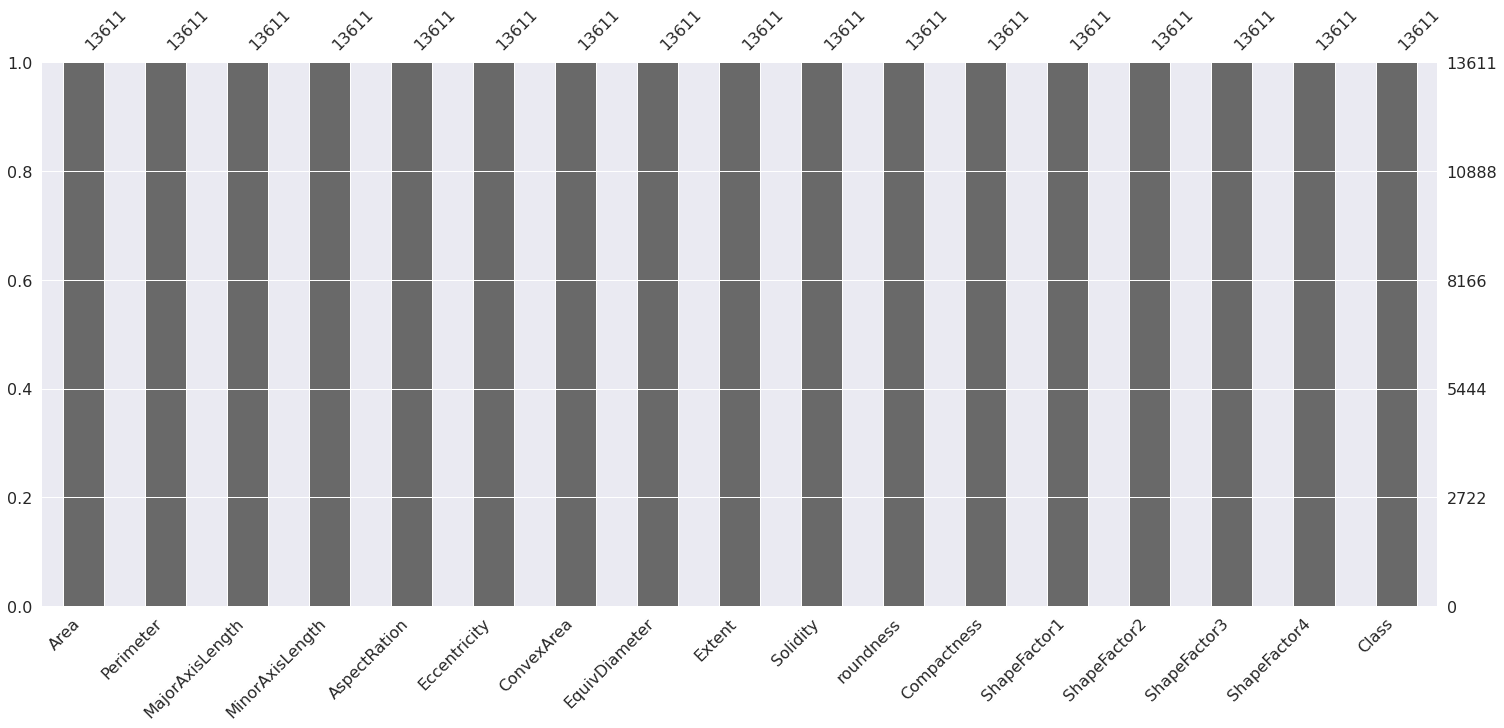

In [7]:
#Good to go now check for missing values
mno.bar(df)

In [8]:
#No missing data so let's 'add' some
columns_to_affect = np.random.choice(df.columns[:-1], 7, replace=False)
print(columns_to_affect)
#set how much of each columns is to be deleted
del_p = np.array([0.1, 0.2, 0.05, 0.4, 0.6, 0.17, 0.05])

['Perimeter' 'AspectRation' 'ConvexArea' 'roundness' 'Area' 'ShapeFactor1'
 'EquivDiameter']


In [9]:
#before proceeding split classes from the rest of the data
data, results = df[df.columns[:-1]], df[df.columns[-1]]
data.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
11603  31020    650.302       242.473601       163.417672      1.483766   
1227   40533    755.940       252.952624       204.317247      1.238039   
948    38852    716.903       252.085058       197.161652      1.278570   
10823  27994    628.839       238.964680       149.393546      1.599565   
10003  54203    883.783       342.848053       202.181397      1.695745   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
11603      0.738767       31419     198.735731  0.771220  0.987301   0.921768   
1227       0.589554       41130     227.174423  0.767205  0.985485   0.891341   
948        0.623123       39209     222.413810  0.744291  0.990895   0.949954   
10823      0.780489       28369     188.793718  0.765973  0.986781   0.889602   
10003      0.807614       54803     262.704022  0.786098  0.989052   0.872051   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
11603     0.819618      0.007817      0.002176      0.671774      0.996755  
1227      0.898091      0.006241      0.002504      0.806567      0.998561  
948       0.882297      0.006488      0.002425      0.778447      0.995300  
10823     0.790049      0.008536      0.002051      0.624177      0.998411  
10003     0.766240      0.006325      0.001345      0.587124      0.995613

In [10]:
results.head()

11603    DERMASON
1227        SEKER
948         SEKER
10823    DERMASON
10003        SIRA
Name: Class, dtype: object

In [12]:
rows_cnt_original, columns_cnt_original = df.shape

for col, prob in zip(columns_to_affect, del_p):
    
    print(f"Deleting {prob*100:2.0f}% etnries in column: {col}")
    
    prob_sample = np.random.rand(rows_cnt_original)

    drop_idx = np.asarray(data[col].index)[prob_sample < prob]

    data.loc[drop_idx, col] = np.NaN


Deleting 10% etnries in column: Perimeter
Deleting 20% etnries in column: AspectRation
Deleting  5% etnries in column: ConvexArea
Deleting 40% etnries in column: roundness
Deleting 60% etnries in column: Area
Deleting 17% etnries in column: ShapeFactor1
Deleting  5% etnries in column: EquivDiameter


<AxesSubplot:>

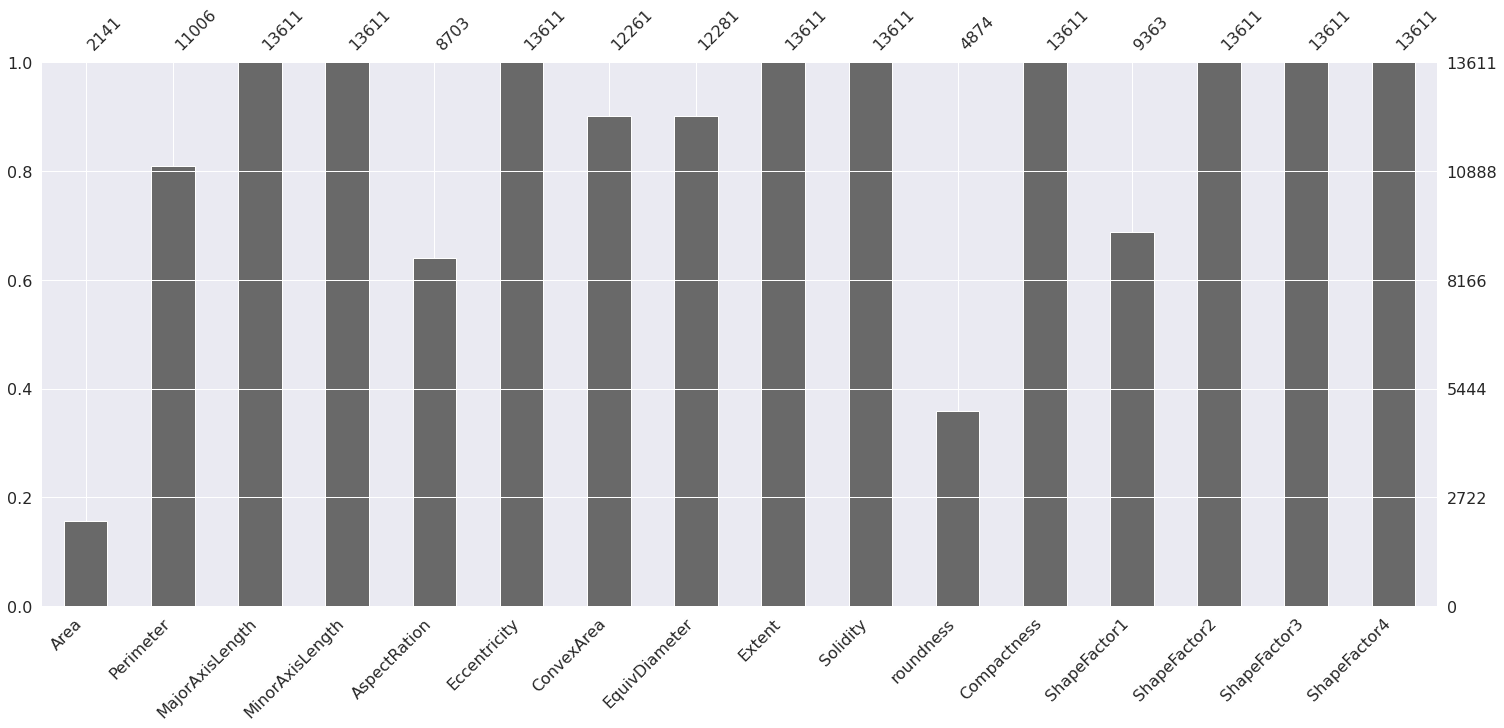

In [13]:
mno.bar(data)

<AxesSubplot:>

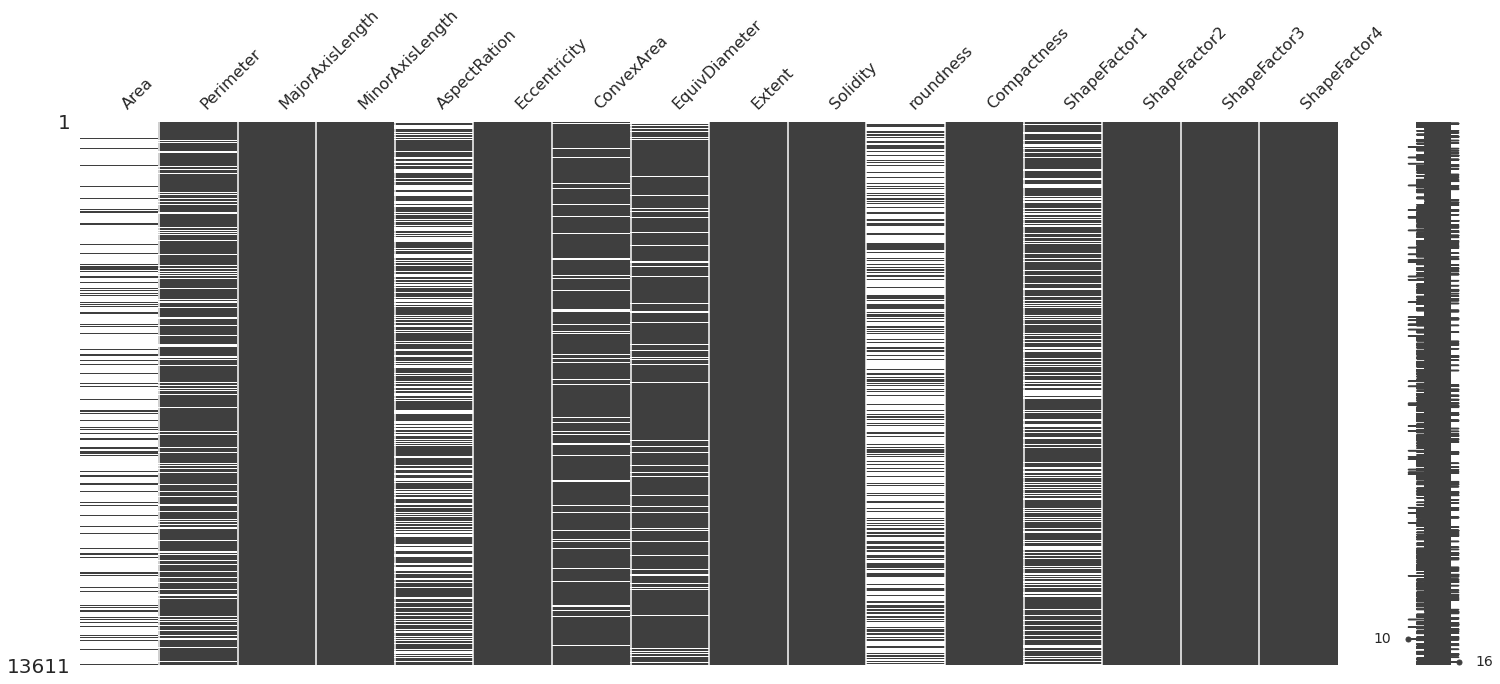

In [14]:
mno.matrix(data)

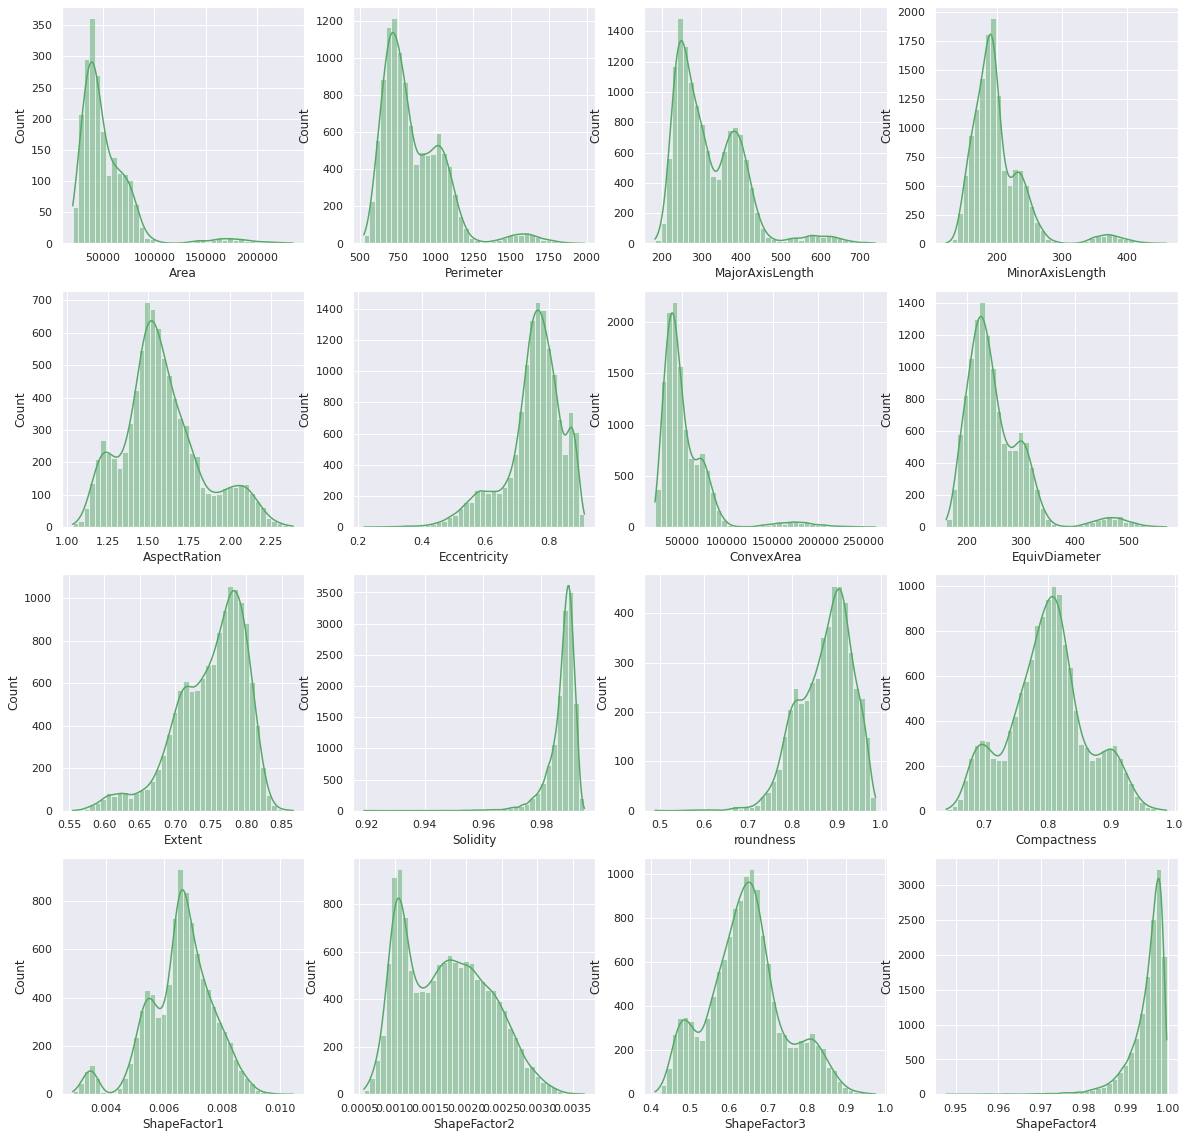

In [15]:
x = np.linspace(0.0, 10.0, 1000)
y = np.sin(x)

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

for i in np.arange(4):
    for y in np.arange(4):
        idx = 4 * i + y
        sns.histplot(data[data.columns[idx]], bins=40, color='g', kde=True, ax=ax[i,y])
        #ax[i,y].set_title(data.columns[idx])

plt.show()

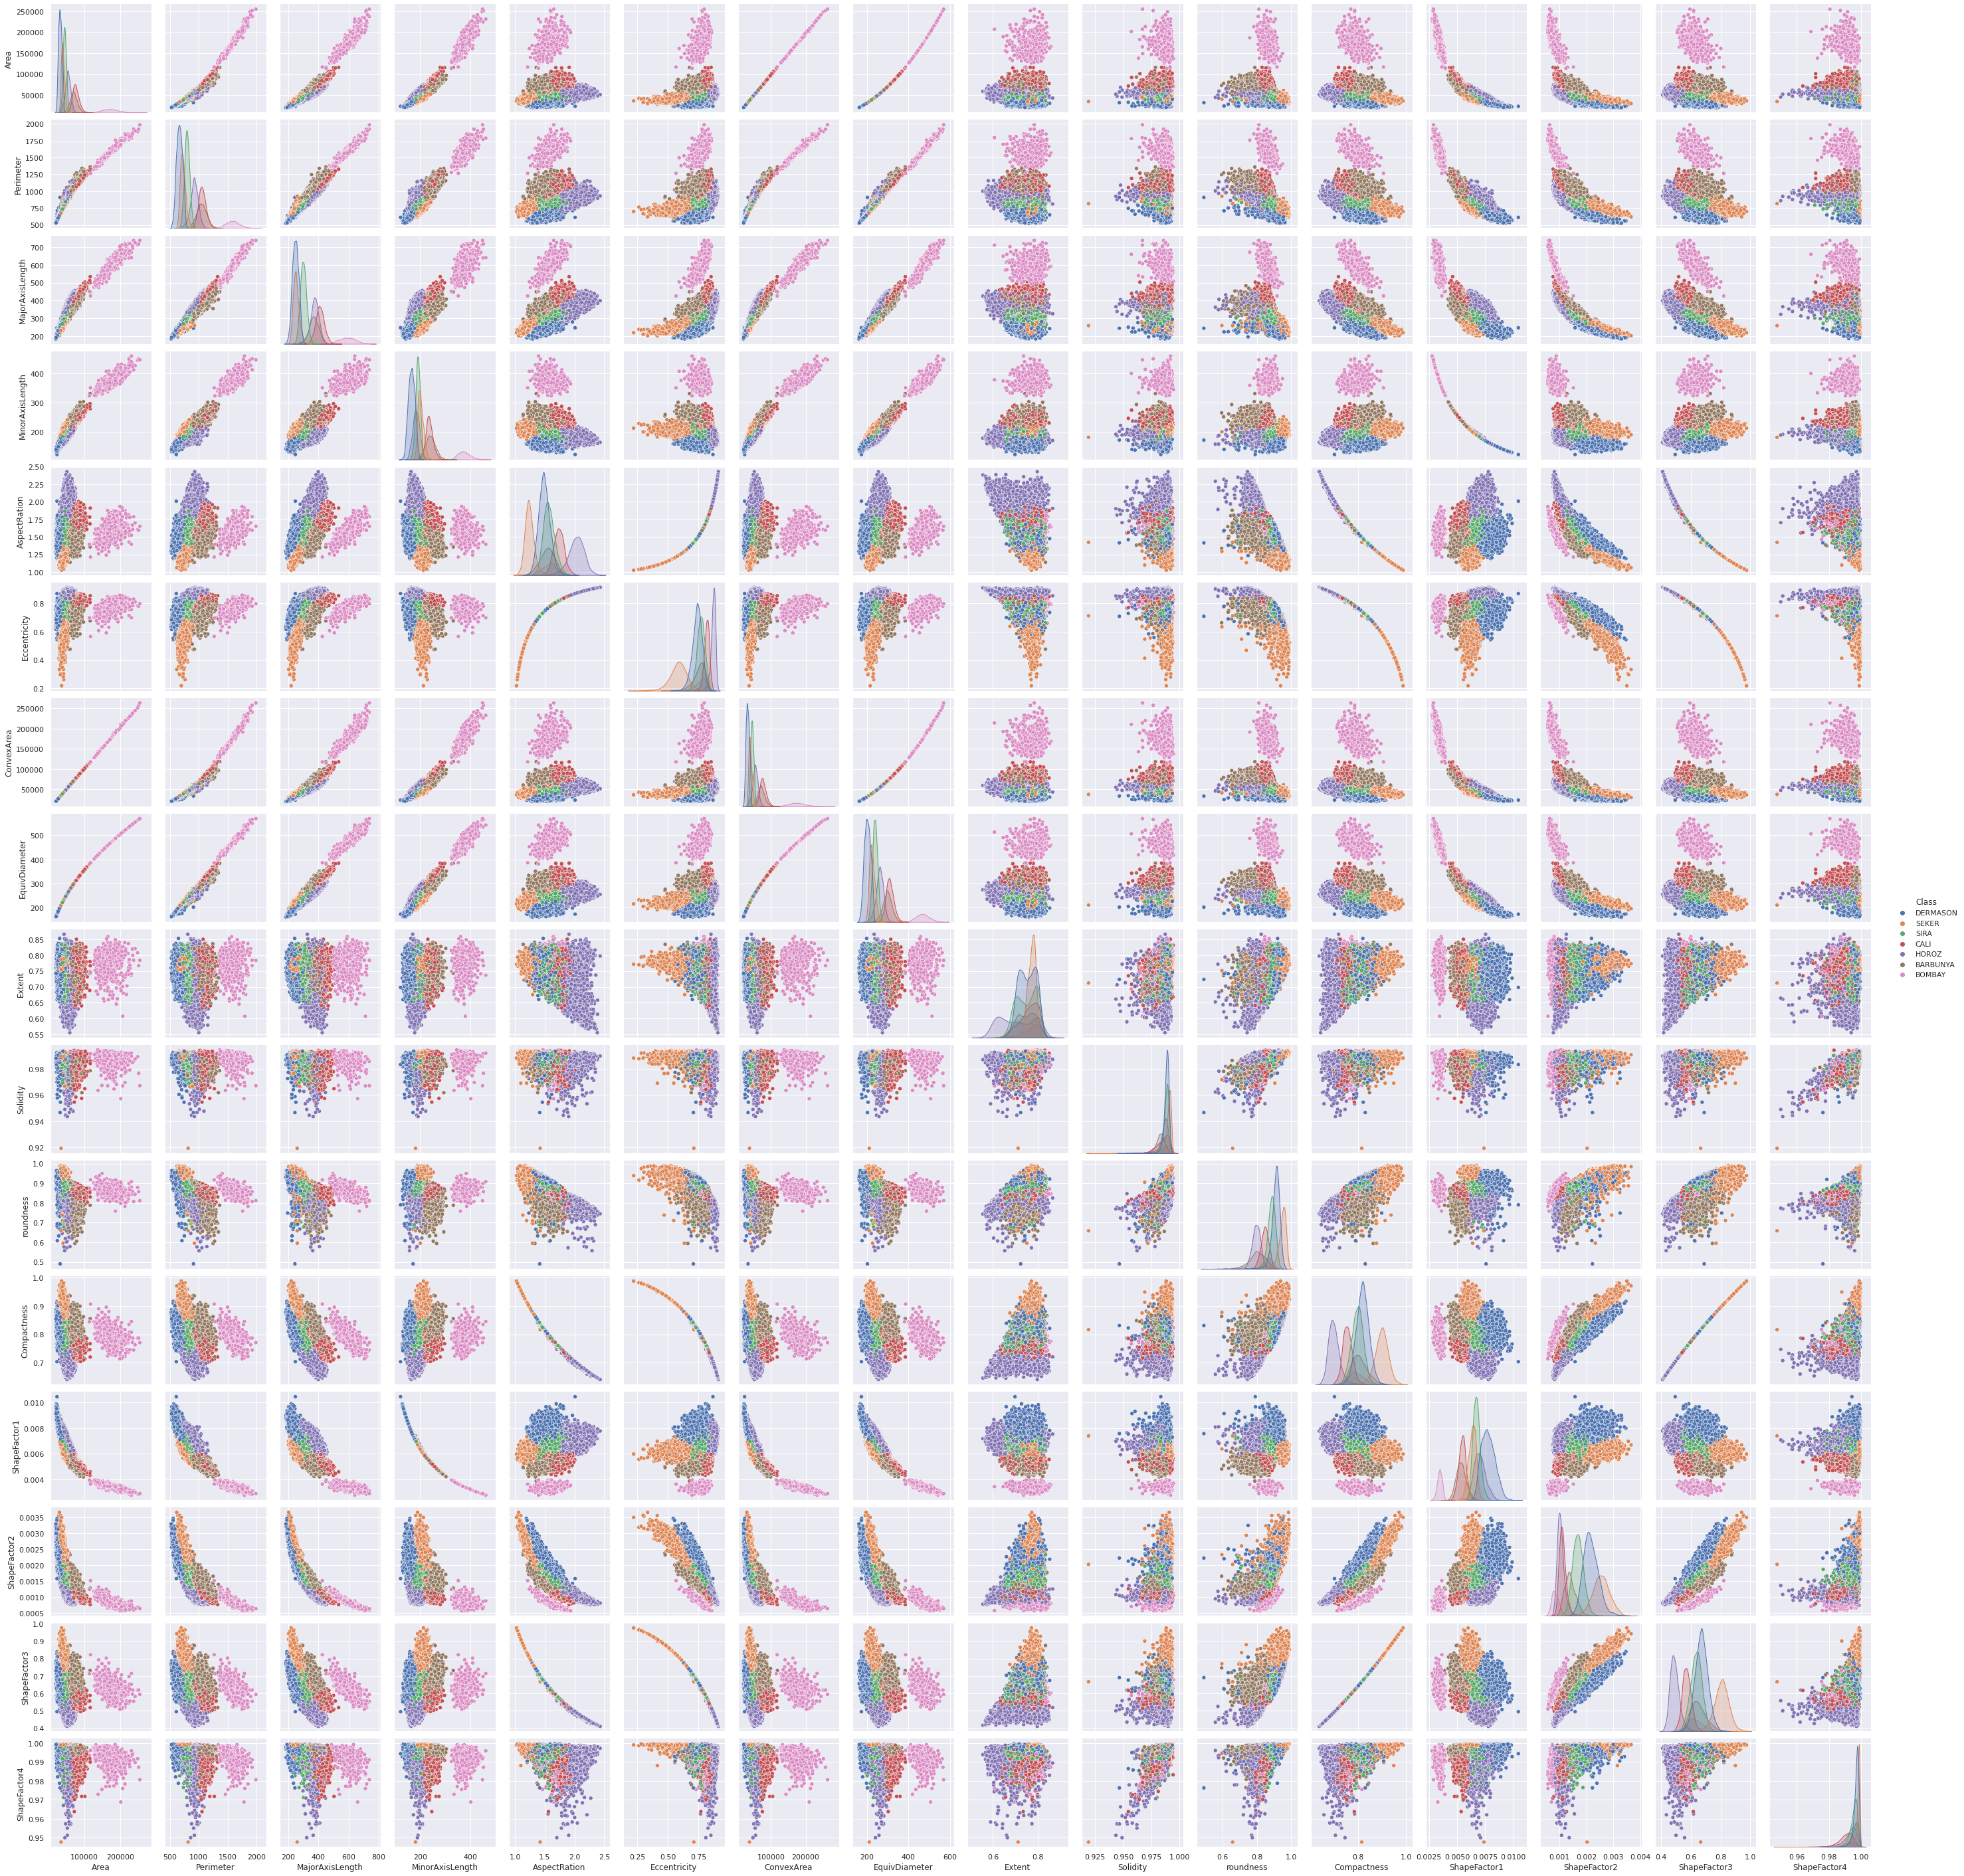

In [16]:
sns.pairplot(df, hue="Class")

In [17]:
correlations = df.corr()
print(correlations)

                     Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966722         0.931834         0.951602   
Perimeter        0.966722   1.000000         0.977338         0.913179   
MajorAxisLength  0.931834   0.977338         1.000000         0.826052   
MinorAxisLength  0.951602   0.913179         0.826052         1.000000   
AspectRation     0.241735   0.385276         0.550335        -0.009161   
Eccentricity     0.267481   0.391066         0.541972         0.019574   
ConvexArea       0.999939   0.967689         0.932607         0.951339   
EquivDiameter    0.984968   0.991380         0.961733         0.948539   
Extent           0.054345  -0.021160        -0.078062         0.145957   
Solidity        -0.196585  -0.303970        -0.284302        -0.155831   
roundness       -0.357530  -0.547647        -0.596358        -0.210344   
Compactness     -0.268067  -0.406857        -0.568377        -0.015066   
ShapeFactor1    -0.847958  -0.864623  

In [18]:
df["Class"]

11603    DERMASON
1227        SEKER
948         SEKER
10823    DERMASON
10003        SIRA
           ...   
1361        SEKER
2340     BARBUNYA
219         SEKER
7654         SIRA
2609     BARBUNYA
Name: Class, Length: 13611, dtype: object

<AxesSubplot:>

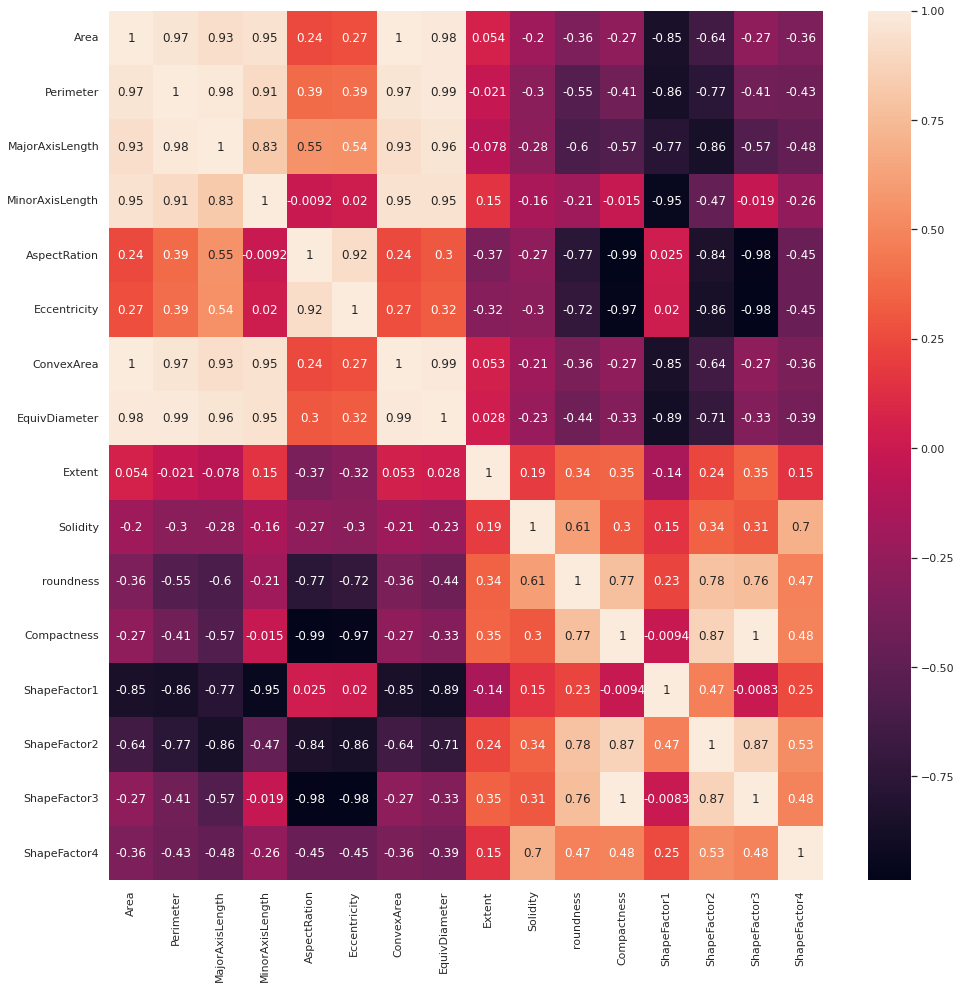

In [19]:
#Corelation heatmap
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True)

In [20]:
pd.set_option('display.float_format', '{:.2E}'.format)
data.mean()

Area              5.35E+04
Perimeter         8.56E+02
MajorAxisLength   3.20E+02
MinorAxisLength   2.02E+02
AspectRation      1.58E+00
Eccentricity      7.51E-01
ConvexArea        5.38E+04
EquivDiameter     2.53E+02
Extent            7.50E-01
Solidity          9.87E-01
roundness         8.75E-01
Compactness       8.00E-01
ShapeFactor1      6.56E-03
ShapeFactor2      1.72E-03
ShapeFactor3      6.44E-01
ShapeFactor4      9.95E-01
dtype: float64

In [21]:
data.std()

Area              2.94E+04
Perimeter         2.15E+02
MajorAxisLength   8.57E+01
MinorAxisLength   4.50E+01
AspectRation      2.48E-01
Eccentricity      9.20E-02
ConvexArea        2.98E+04
EquivDiameter     5.93E+01
Extent            4.91E-02
Solidity          4.66E-03
roundness         5.92E-02
Compactness       6.17E-02
ShapeFactor1      1.12E-03
ShapeFactor2      5.96E-04
ShapeFactor3      9.90E-02
ShapeFactor4      4.37E-03
dtype: float64

In [22]:
data.max()

Area              2.35E+05
Perimeter         1.99E+03
MajorAxisLength   7.39E+02
MinorAxisLength   4.60E+02
AspectRation      2.39E+00
Eccentricity      9.11E-01
ConvexArea        2.63E+05
EquivDiameter     5.69E+02
Extent            8.66E-01
Solidity          9.95E-01
roundness         9.88E-01
Compactness       9.87E-01
ShapeFactor1      1.05E-02
ShapeFactor2      3.66E-03
ShapeFactor3      9.75E-01
ShapeFactor4      1.00E+00
dtype: float64

In [23]:
data.min()

Area              2.08E+04
Perimeter         5.25E+02
MajorAxisLength   1.84E+02
MinorAxisLength   1.23E+02
AspectRation      1.04E+00
Eccentricity      2.19E-01
ConvexArea        2.07E+04
EquivDiameter     1.61E+02
Extent            5.55E-01
Solidity          9.19E-01
roundness         4.90E-01
Compactness       6.41E-01
ShapeFactor1      2.86E-03
ShapeFactor2      5.64E-04
ShapeFactor3      4.10E-01
ShapeFactor4      9.48E-01
dtype: float64

In [24]:
data.var()

Area              8.66E+08
Perimeter         4.62E+04
MajorAxisLength   7.34E+03
MinorAxisLength   2.02E+03
AspectRation      6.14E-02
Eccentricity      8.46E-03
ConvexArea        8.90E+08
EquivDiameter     3.51E+03
Extent            2.41E-03
Solidity          2.17E-05
roundness         3.51E-03
Compactness       3.81E-03
ShapeFactor1      1.26E-06
ShapeFactor2      3.55E-07
ShapeFactor3      9.80E-03
ShapeFactor4      1.91E-05
dtype: float64

In [25]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [26]:
z = data.std().values
mean = data.mean().values
low_z_bound = mean - 3 * z
high_z_bound = mean + 3 * z

for x,y,z in zip(low_z_bound, mean, high_z_bound):
    print(f"{x:5.2f} < {y:5.2f} < {z:5.2f}")

-34738.85 < 53525.50 < 141789.84
211.22 < 855.78 < 1500.33
63.06 < 320.14 < 577.22
67.36 < 202.27 < 337.18
 0.84 <  1.58 <  2.33
 0.47 <  0.75 <  1.03
-35760.66 < 53754.01 < 143268.69
75.28 < 253.12 < 430.97
 0.60 <  0.75 <  0.90
 0.97 <  0.99 <  1.00
 0.70 <  0.87 <  1.05
 0.61 <  0.80 <  0.99
 0.00 <  0.01 <  0.01
-0.00 <  0.00 <  0.00
 0.35 <  0.64 <  0.94
 0.98 <  1.00 <  1.01


In [27]:
row_drops = 0;
data_arr = np.array(data)

for row in data_arr:
    for low, high, val in zip(low_z_bound, high_z_bound, row):
        if not np.isnan(val):
            if not low < val < high:
                row_drops += 1
                break
        
print(f"End results (while ignoring Nan results in a total of {row_drops} rows dropped, which is {row_drops/data_arr.shape[0]:.4f}% of the dataset)")

End results (while ignoring Nan results in a total of 1097 rows dropped, which is 0.0806% of the dataset)


In [28]:
if (data.index == results.index).all():
    print("Well done")
else:
    print("Messed up")

Well done


In [29]:
data_bck = data.copy()

data['Class'] = results

data.drop(["Area", "roundness"], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13611 entries, 11603 to 2609
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Perimeter        11006 non-null  float64
 1   MajorAxisLength  13611 non-null  float64
 2   MinorAxisLength  13611 non-null  float64
 3   AspectRation     8703 non-null   float64
 4   Eccentricity     13611 non-null  float64
 5   ConvexArea       12261 non-null  float64
 6   EquivDiameter    12281 non-null  float64
 7   Extent           13611 non-null  float64
 8   Solidity         13611 non-null  float64
 9   Compactness      13611 non-null  float64
 10  ShapeFactor1     9363 non-null   float64
 11  ShapeFactor2     13611 non-null  float64
 12  ShapeFactor3     13611 non-null  float64
 13  ShapeFactor4     13611 non-null  float64
 14  Class            13611 non-null  object 
dtypes: float64(14), object(1)
memory usage: 2.2+ MB


In [30]:
#Save
data.to_csv("Beans_formatted.csv");

In [31]:
data_copy = data_arr.copy()
np.nan_to_num(data_copy, nan=0, copy=False)
data_copy

array([[0.00000000e+00, 0.00000000e+00, 2.42473601e+02, ...,
        2.17594747e-03, 6.71773686e-01, 9.96755015e-01],
       [0.00000000e+00, 0.00000000e+00, 2.52952624e+02, ...,
        2.50432784e-03, 8.06567075e-01, 9.98561114e-01],
       [3.88520000e+04, 7.16903000e+02, 2.52085058e+02, ...,
        2.42533685e-03, 7.78447430e-01, 9.95299868e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 2.31917049e+02, ...,
        2.76764575e-03, 8.17246926e-01, 9.98942305e-01],
       [0.00000000e+00, 7.34308000e+02, 2.69044213e+02, ...,
        1.98149308e-03, 6.78775774e-01, 9.91704341e-01],
       [0.00000000e+00, 1.06824700e+03, 3.74539610e+02, ...,
        1.29823941e-03, 6.19102646e-01, 9.84872917e-01]])

In [32]:
results_num = results.copy()
results_one_hot = results.copy()
unique_entries = set(results_num.values)

In [33]:
results_num.replace(unique_entries, np.arange(len(unique_entries)), inplace=True)
results_num

11603    5
1227     0
948      0
10823    5
10003    2
        ..
1361     0
2340     1
219      0
7654     2
2609     1
Name: Class, Length: 13611, dtype: int64

In [34]:
enc = np.zeros((len(unique_entries),len(unique_entries)))
for i in np.arange(len(unique_entries)):
    enc[i][i] = 1
print(enc)

results_one_hot = np.array(results_num.values)

results_one_hot = enc[results_one_hot]
results_one_hot

[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])